In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [15]:
df_2007 = pd.read_csv('input/accidents_2005_to_2007.csv')
df_2011 = pd.read_csv('input/accidents_2009_to_2011.csv') 
df_2014 = pd.read_csv('input/accidents_2012_to_2014.csv')

In [16]:
df_allyears = pd.concat([df_2007,df_2011,df_2014])

In [17]:
df_allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [18]:
df_allyears.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [22]:
df_allyears.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [26]:
df_allyears['Road_Type'].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', 'Slip road', 'Unknown'], dtype=object)

In [36]:
df_allyears['Number_of_Casualties'].unique()

array([ 1,  2,  5,  4,  3,  8,  7,  6, 10,  9, 23, 17, 13, 11, 19, 15, 16,
       12, 14, 18, 20, 29, 21, 35, 22, 26, 45, 41, 36, 40, 25, 28, 42, 68,
       27, 48, 24, 43, 87, 63, 51, 33, 38, 46, 70, 93, 54], dtype=int64)

In [37]:
df_allyears['Number_of_Vehicles'].unique()

array([ 1,  2,  4,  3,  5,  6,  8,  7, 13, 10, 11, 18,  9, 20, 17, 15, 12,
       14, 22, 16, 28, 32, 19, 29, 34, 67, 21], dtype=int64)

In [38]:
df_allyears['Day_of_Week'].unique()

array([3, 4, 5, 6, 2, 7, 1], dtype=int64)

,Features,MissingPercent
5,Junction_Detail,100.000000
6,Junction_Control,40.078117
14,LSOA_of_Accident_Location,7.195958
13,Did_Police_Officer_Attend_Scene_of_Accident,0.194263
10,Road_Surface_Conditions,0.130173
9,Weather_Conditions,0.008377
4,Time,0.007778
0,Location_Easting_OSGR,0.006715
1,Location_Northing_OSGR,0.006715
2,Longitude,0.006715


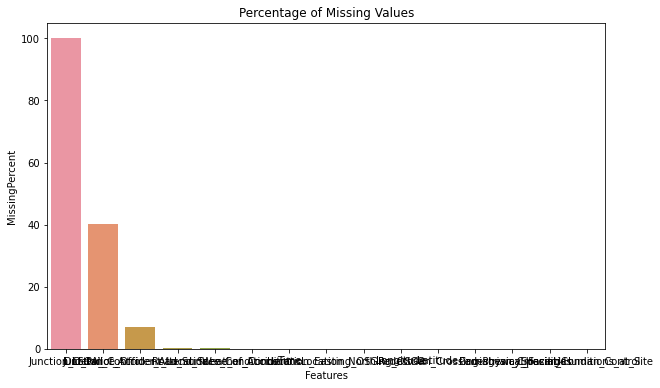

In [52]:
def func_missings(df):
    labels,values = list(),list()
    if df.isnull().sum().sum() > 0:
        for column in df.columns:
            if df[column].isnull().sum():
                labels.append(column)
                values.append((df[column].isnull().sum() / len(df[column]))*100)
                
                missings=pd.DataFrame({'Features':labels,'MissingPercent':values }).sort_values(by='MissingPercent',ascending=False)
        plt.figure(figsize=(10,6))
        plt.tight_layout()
        sns.barplot(x=missings.Features,y=missings.MissingPercent).set_title('Percentage of Missing Values')
        return missings
    else:
        return False

func_missings(df_allyears)


In [53]:
accidents_peryear = {}

years = ['2005', '2006', "2007", "2009", "2010", "2011", "2012", "2013", "2014"]
for year in years:
    accidents_peryear[year] = df_allyears[df_allyears["Year"]==int(year)]

accidents_perdow = {}

dow = {1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 7:"Sunday"}
for key in dow:
    accidents_perdow[dow[key]] = df_allyears[df_allyears["Day_of_Week"]==key]
    
months = {1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Ag", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

**Road Type**

In [56]:
road = df_allyears["Road_Type"].value_counts()
road

Single carriageway    1126951
Dual carriageway       221741
Roundabout             100463
One way street          30981
Slip road               15668
Unknown                  8346
Name: Road_Type, dtype: int64

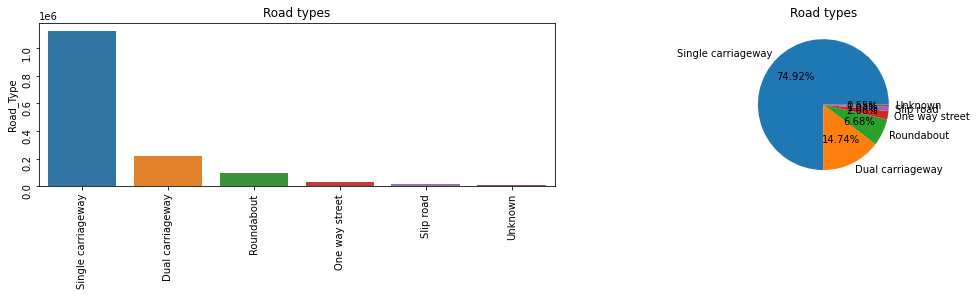

<Figure size 432x288 with 0 Axes>

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,4))

sns.barplot(ax=axs[0], x = road.index, y = road)
axs[0].set_title("Road types")
axs[0].tick_params(labelrotation=90)

axs[1].pie(road, labels=road.index, autopct='%1.2f%%')
axs[1].set_title("Road types")

plt.show()
plt.tight_layout()

**Speed Limit**

In [72]:
speed = df_allyears['Speed_limit'].value_counts()
speed

30    968284
60    238234
40    122393
70    109268
50     48790
20     17157
10        14
15        10
Name: Speed_limit, dtype: int64

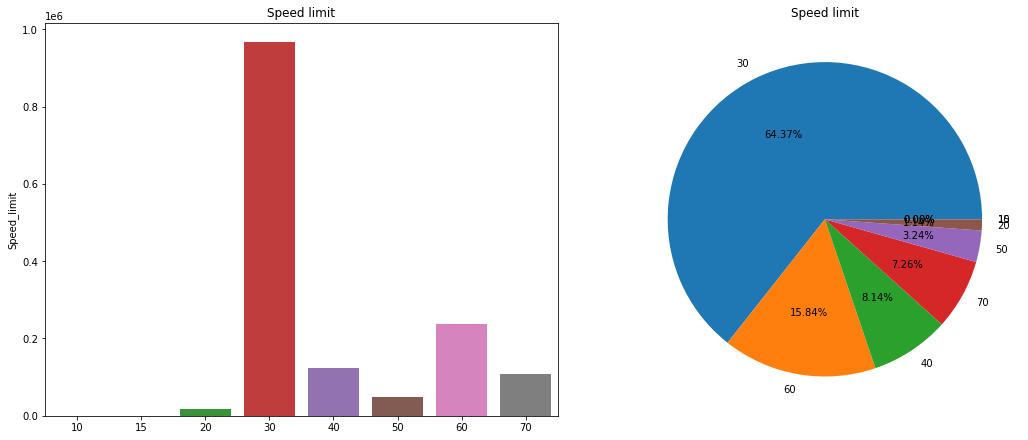

In [73]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,6))


sns.barplot(ax=axs[0], x = speed.index, y = speed)
axs[0].set_title("Speed limit")

axs[1].pie(speed, labels=speed.index, autopct='%1.2f%%')
axs[1].set_title("Speed limit")

plt.show()

**Years**

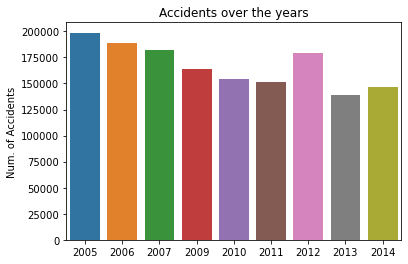

Mean:167127.78   Standard Deviation:21006.79


In [81]:
sns.barplot(x=df_allyears.Year.value_counts().index,y=df_allyears.Year.value_counts())
plt.ylabel("Num. of Accidents")
plt.title("Accidents over the years")

plt.show()

print("Mean:{:.2f}   Standard Deviation:{:.2f}".format(df_allyears.Year.value_counts().mean(), 
                                                      df_allyears.Year.value_counts().std()))

In [85]:
areas = df_allyears["Urban_or_Rural_Area"].value_counts()
areas

1    972007
2    532011
3       132
Name: Urban_or_Rural_Area, dtype: int64

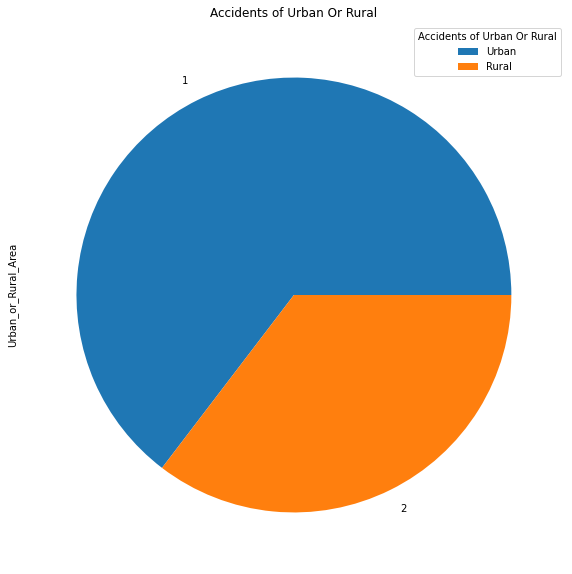

In [87]:
area = pd.DataFrame(df_allyears["Urban_or_Rural_Area"].value_counts())
area = area.drop([3])

area.plot.pie(y="Urban_or_Rural_Area",figsize=[10,10])
plt.title("Accidents of Urban Or Rural")
plt.legend(title="Accidents of Urban Or Rural",labels=["Urban","Rural"])